# Scaling Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.preprocessing
from sklearn.model_selection import train_test_split


import acquire as acquire

import warnings
warnings.filterwarnings("ignore")



In [2]:
from acquire import get_telco_data

In [3]:
telco = get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,...,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,...,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,...,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check
3,1,1,2,2969-WGHQO,Female,0,Yes,Yes,7,Yes,...,No,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check
4,1,1,2,2988-PLAHS,Female,0,No,No,3,Yes,...,No,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check


In [4]:
telco.shape

(7043, 24)

In [5]:
telco.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [6]:
def split_my_data(df):
    '''
    This function performs a 3-way split returning my train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [7]:
telco_train, telco_validate, telco_test = split_my_data(telco)

In [8]:
print(f'train -> {telco_train.shape}')
print(f'validate -> {telco_validate.shape}')
print(f'test -> {telco_test.shape}')

train -> (3943, 24)
validate -> (1691, 24)
test -> (1409, 24)


<AxesSubplot:ylabel='Frequency'>

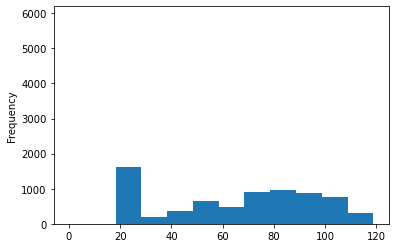

In [20]:
telco.monthly_charges.plot.hist()
telco.senior_citizen.plot.hist()

In [30]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(telco_train[['monthly_charges', 'senior_citizen']])

# 3. use the object (use the min, max to do the transformation)
scaled_bill = scaler.transform(telco_train[['monthly_charges', 'senior_citizen']])
scaled_bill[:10]

array([[0.6553616 , 0.        ],
       [0.33167082, 1.        ],
       [0.01296758, 0.        ],
       [0.01197007, 0.        ],
       [0.60349127, 0.        ],
       [0.90573566, 0.        ],
       [0.49775561, 0.        ],
       [0.90274314, 1.        ],
       [0.47182045, 0.        ],
       [0.80099751, 0.        ]])

In [32]:
# assign the scaled values as new columns in the train
train[['monthly_charges', 'senior_citizen']] = scaled_bill

ValueError: Length of values (3943) does not match length of index (188)

In [23]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(telco_train)

x_train_scaled = scaler.transform(telco_train)
x_validate_scaled = scaler.transform(telco_validate)
x_test_scaled = scaler.transform(telco_test)


ValueError: could not convert string to float: '5032-USPKF'

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(telco_train)

x_train_scaled = scaler.transform(telco_train)
x_validate_scaled = scaler.transform(telco_validate)
x_test_scaled = scaler.transform(telco_test)
